In [135]:
install.packages("fastDummies")
install.packages("stats")
install.packages("broom")
install.packages("glmnet")
install.packages("dplyr")
install.packages("caret")

Warning message:
"package 'fastDummies' is in use and will not be installed"
Warning message:
"package 'stats' is in use and will not be installed"
Warning message:
"package 'broom' is in use and will not be installed"
Warning message:
"package 'glmnet' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
also installing the dependencies 'future.apply', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'clock', 'gower', 'hardhat', 'ipred', 'e1071', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'




package 'future.apply' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'caret' successfully unp

In [1]:
library(fastDummies)
library(stats)
library(broom)
library(glmnet)
library(dplyr)
library(caret)

Warning message:
"package 'fastDummies' was built under R version 4.3.3"
Warning message:
"package 'broom' was built under R version 4.3.3"
Warning message:
"package 'glmnet' was built under R version 4.3.3"
Loading required package: Matrix

Loaded glmnet 4.1-8

Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Loading required package: lattice



In [2]:
dados = read.csv("forum_mushrooms_train.csv")
dados

class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
p,k,s,n,f,y,f,c,n,b,⋯,p,w,p,w,o,e,w,v,l,1
p,f,y,y,f,f,f,c,b,p,⋯,b,p,p,w,o,l,h,v,p,2
p,x,f,y,f,f,f,c,b,p,⋯,n,n,p,w,o,l,h,v,d,3
e,x,s,g,f,n,f,w,b,p,⋯,w,w,p,w,t,p,w,n,g,4
e,f,f,n,t,n,f,c,b,p,⋯,p,p,p,w,o,p,k,y,d,5
p,x,s,g,f,c,f,c,n,p,⋯,w,w,p,w,o,p,n,s,d,6
e,f,f,n,t,n,f,c,b,w,⋯,g,p,p,w,o,p,n,v,d,7
e,x,f,g,t,n,f,c,b,n,⋯,g,p,p,w,o,p,k,v,d,8
p,x,s,b,t,f,f,c,b,w,⋯,w,w,p,w,o,p,h,v,g,9


In [3]:
dados = dummy_cols(dados, remove_first_dummy = TRUE, remove_selected_columns = TRUE)
dados = dados[ , !(names(dados) %in% ("Id"))]
dados

class_p,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,⋯,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,0,1,0,0,⋯,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,⋯,0,0,1,0,1,0,0,0,0,0


In [4]:
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(dados), replace=TRUE, prob=c(0.7,0.3))
treino  <- dados[sample, ]
teste   <- dados[!sample, ]

In [5]:
# Ajustar um modelo logit
logit = glm( class_p ~ ., data = treino, family = binomial(link = "logit"), control = list(maxit = 10000))
tidy(logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.156610e+01,85718554,-3.682528e-07,0.9999997
cap_shape_c,1.796632e-07,62307629,2.883487e-15,1.0000000
cap_shape_f,4.435798e-08,6051226,7.330413e-15,1.0000000
cap_shape_k,-6.651547e-08,6568425,-1.012655e-14,1.0000000
cap_shape_s,5.819921e-08,21863766,2.661902e-15,1.0000000
cap_shape_x,4.107705e-08,5795338,7.087948e-15,1.0000000
cap_surface_g,-7.506889e-05,62228313,-1.206346e-12,1.0000000
cap_surface_s,5.022271e-10,3525663,1.424490e-16,1.0000000
cap_surface_y,1.603084e-08,2943353,5.446455e-15,1.0000000


In [6]:
# Como o modelo não convergiu, é necessário ajustar um modelo Lasso para selecionar variáveis
lasso = cv.glmnet(as.matrix(treino[ , !(names(treino) %in% ("class_p"))]), treino[ , "class_p"])
lasso_coefs = coef(lasso, s = "lambda.min")
lasso_coefs

97 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                 0.0381526493
cap_shape_c                 0.5183265039
cap_shape_f                 .           
cap_shape_k                 0.0014562707
cap_shape_s                -0.0001503440
cap_shape_x                 .           
cap_surface_g               0.5179368694
cap_surface_s               .           
cap_surface_y               0.0008221408
cap_color_c                -0.0988632866
cap_color_e                 .           
cap_color_g                 .           
cap_color_n                -0.0009815201
cap_color_p                 .           
cap_color_r                 .           
cap_color_u                 .           
cap_color_w                 0.0035581573
cap_color_y                 .           
bruises_t                   .           
odor_c                      0.9609791564
odor_f                      0.8011028322
odor_l                     -0.0044811570
odor_m         

In [7]:
# Converte os coeficientes em um data frame
lasso_coefs_df <- as.data.frame(as.matrix(lasso_coefs))

# Renomeia as colunas para facilitar a interpretação
colnames(lasso_coefs_df) <- c("Coeficiente")

# Filtra as variáveis com coeficientes diferentes de zero (excluindo o intercepto)
variaveis_selecionadas <- rownames(lasso_coefs_df)[lasso_coefs_df$Coeficiente != 0]

# Exclui o intercepto da lista
variaveis_selecionadas <- variaveis_selecionadas[variaveis_selecionadas != "(Intercept)"]

# Seleciona as variáveis não nulas do conjunto de dados original
treino_selecionado <- cbind(class_p = treino$class_p, treino[, variaveis_selecionadas])
treino_selecionado

,class_p,cap_shape_c,cap_shape_k,cap_shape_s,cap_surface_g,cap_surface_y,cap_color_c,cap_color_n,cap_color_w,odor_c,⋯,ring_type_f,ring_type_l,spore_print_color_h,spore_print_color_n,spore_print_color_r,spore_print_color_u,spore_print_color_w,population_c,population_n,habitat_w
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
12,0,0,1,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,1,0,0,0


In [8]:
# Ajustar um modelo logit com as variáveis selecionadas
logit = glm( class_p ~ ., data = treino_selecionado, family = binomial(link = "logit"), control = list(maxit = 10000))
tidy(logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.212260e+01,16462040.9,-1.951313e-06,0.9999984
cap_shape_c,2.527282e+00,2685474.5,9.410931e-07,0.9999992
cap_shape_k,7.164230e-02,575438.1,1.245005e-07,0.9999999
cap_shape_s,1.151809e-02,19639183.7,5.864851e-10,1.0000000
cap_surface_g,2.516186e+00,2820134.6,8.922218e-07,0.9999993
cap_surface_y,6.054544e-02,951176.3,6.365323e-08,0.9999999
cap_color_c,-1.718593e+00,13106590.4,-1.311244e-07,0.9999999
cap_color_n,-1.451627e-01,2701881.2,-5.372652e-08,1.0000000
cap_color_w,3.537199e-01,3752142.5,9.427145e-08,0.9999999


In [9]:
# Como o modelo não convergiu, é necessária um seleção mais refinada das variáveis utilizando o lasso
print(lasso$lambda.min)
print(log(lasso$lambda.min))

[1] 0.0003337318
[1] -8.005173


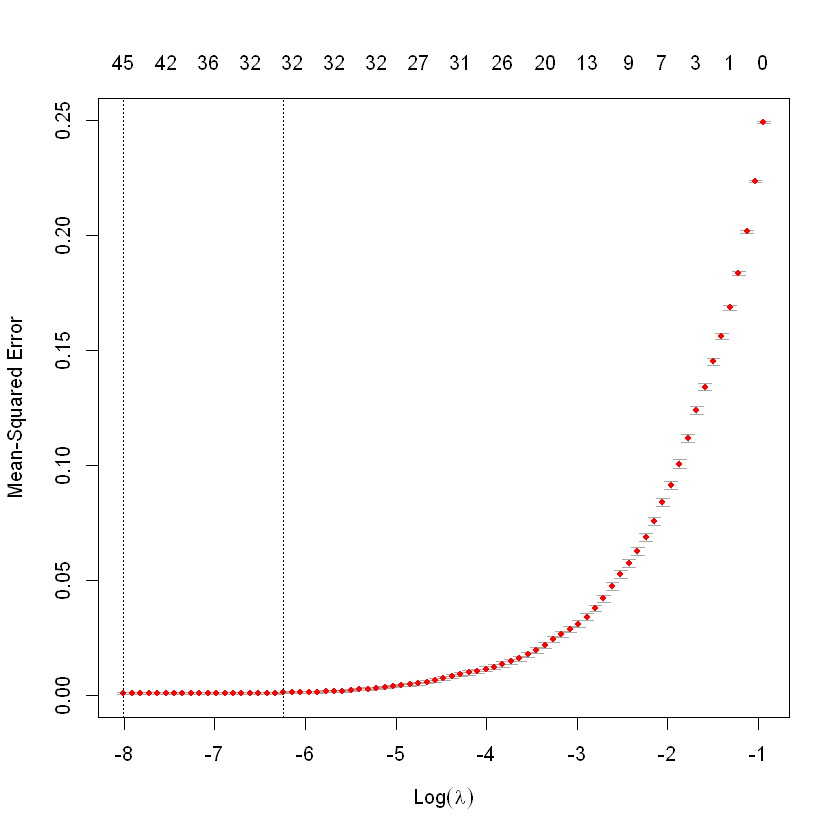

In [10]:
# Visualização da média dos erros do lasso em função do lambda
lasso = cv.glmnet(as.matrix(treino[ , !(names(treino) %in% ("class_p"))]), treino[ , "class_p"])
plot(lasso)

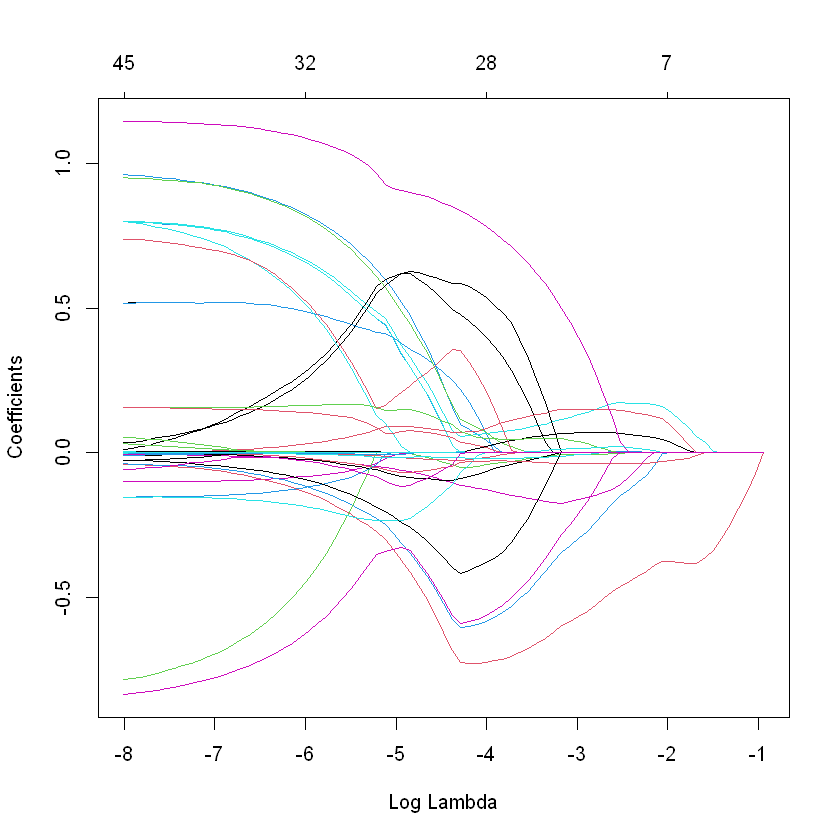

In [11]:
# Visualização de como os coeficientes do lasso se comportam com valores variados de lambda
res = glmnet(as.matrix(treino[ , !(names(treino) %in% ("class_p"))]), treino[ , "class_p"])
plot(res, xvar = "lambda")

In [12]:
# Criação de modelo lasso com o lambda mínimo limite, no qual o modelo logit com as variáveis selecionadas converge para um resultado
lasso = glmnet(as.matrix(treino[ , !(names(treino) %in% ("class_p"))]), treino[ , "class_p"], lambda = exp(-2))
lasso_coefs = coef(lasso, s = exp(-2))
lasso_coefs

97 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)                 0.57245617
cap_shape_c                 .         
cap_shape_f                 .         
cap_shape_k                 .         
cap_shape_s                 .         
cap_shape_x                 .         
cap_surface_g               .         
cap_surface_s               .         
cap_surface_y               .         
cap_color_c                 .         
cap_color_e                 .         
cap_color_g                 .         
cap_color_n                 .         
cap_color_p                 .         
cap_color_r                 .         
cap_color_u                 .         
cap_color_w                 .         
cap_color_y                 .         
bruises_t                   .         
odor_c                      .         
odor_f                      0.15007285
odor_l                      .         
odor_m                      .         
odor_n                

In [13]:
# Converte os coeficientes em um data frame
lasso_coefs_df <- as.data.frame(as.matrix(lasso_coefs))

# Renomeia as colunas para facilitar a interpretação
colnames(lasso_coefs_df) <- c("Coeficiente")

# Filtra as variáveis com coeficientes diferentes de zero (excluindo o intercepto)
variaveis_selecionadas <- rownames(lasso_coefs_df)[lasso_coefs_df$Coeficiente != 0]

# Exclui o intercepto da lista
variaveis_selecionadas <- variaveis_selecionadas[variaveis_selecionadas != "(Intercept)"]

# Seleciona as variáveis não nulas do conjunto de dados original
treino_selecionado <- cbind(class_p = treino$class_p, treino[, variaveis_selecionadas])
treino_selecionado

,class_p,odor_f,odor_n,gill_size_n,stalk_surface_above_ring_k,ring_type_p
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,1,0,0
2,1,1,0,0,1,0
3,1,1,0,0,1,0
5,0,0,1,0,0,1
8,0,0,1,0,0,1
9,1,1,0,0,0,1
10,0,0,1,0,0,1
11,0,0,1,1,0,0
12,0,0,1,0,1,1


In [14]:
# Ajustar um modelo logit com as variáveis finais selecionadas
logit = glm( class_p ~ ., data = treino_selecionado, family = binomial(link = "logit"))
tidy(logit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.488659,0.2638829,-5.6413614,1.687109e-08
odor_f,20.804836,420.7383460,0.0494484,9.605620e-01
odor_n,-3.052233,0.2097880,-14.5491331,5.914786e-48
gill_size_n,4.178718,0.2084810,20.0436430,2.293509e-89
stalk_surface_above_ring_k,2.985846,0.3653876,8.1717205,3.040222e-16
ring_type_p,-1.089349,0.2085030,-5.2246229,1.745104e-07


In [15]:
# Remoção de variável com p-valor maior que o nível de significância de 0.05
treino_selecionado = treino_selecionado[ , !(names(treino_selecionado) %in% ("odor_f"))]

In [16]:
# Ajustar um modelo logit com as variáveis finais selecionadas
logit = glm( class_p ~ ., data = treino_selecionado, family = binomial(link = "logit"))
tidy(logit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.9228336,0.2081947,4.432551,9.312459e-06
odor_n,-4.5472154,0.1918735,-23.699028,3.689880e-124
gill_size_n,2.5801065,0.1663584,15.509321,3.000337e-54
stalk_surface_above_ring_k,3.4384318,0.2545214,13.509404,1.376320e-41
ring_type_p,-1.6249756,0.1968772,-8.253750,1.535000e-16


In [17]:
# Criar uma matriz de confusão nos dados de treino
matriz_confusao <- confusionMatrix(factor(ifelse(predict(logit, type = "response")>0.5,1,0)), factor(treino$class_p))
print(matriz_confusao)

# Calcular métricas de avaliação
precision <- matriz_confusao$byClass["Pos Pred Value"]
recall <- matriz_confusao$byClass["Sensitivity"]
f1_score <- 2 * (precision * recall) / (precision + recall)
print(paste("F1 Score treino:", round(f1_score, 2)))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2177  205
         1   40 1813
                                         
               Accuracy : 0.9421         
                 95% CI : (0.9347, 0.949)
    No Information Rate : 0.5235         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8836         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9820         
            Specificity : 0.8984         
         Pos Pred Value : 0.9139         
         Neg Pred Value : 0.9784         
             Prevalence : 0.5235         
         Detection Rate : 0.5140         
   Detection Prevalence : 0.5625         
      Balanced Accuracy : 0.9402         
                                         
       'Positive' Class : 0              
                                         
[1

In [18]:
# Extrair os valores da matriz de confusão e garantir que são numéricos
vp <- as.numeric(matriz_confusao$table[1, 1])  # Verdadeiros Positivos
fn <- as.numeric(matriz_confusao$table[1, 2])  # Falsos Negativos
fp <- as.numeric(matriz_confusao$table[2, 1])  # Falsos Positivos
vn <- as.numeric(matriz_confusao$table[2, 2])  # Verdadeiros Negativos

# Calcular MCC usando tipos numéricos para evitar overflow
mcc_numerador <- as.numeric(vp * vn - fp * fn)
mcc_denominador <- sqrt(as.numeric((vp + fp) * (vp + fn) * (vn + fp) * (vn + fn)))

# Verificar se o denominador é zero para evitar divisão por zero
if (is.na(mcc_denominador) || mcc_denominador == 0) {
  mcc <- 0
} else {
  mcc <- mcc_numerador / mcc_denominador
}

print(paste("MCC treino:", round(mcc, 4)))

[1] "MCC treino: 0.8863"


In [19]:
# Criar uma matriz de confusão nos dados de teste
matriz_confusao <- confusionMatrix(factor(ifelse(predict(logit, newdata = teste[colnames(treino_selecionado)], type = "response")>0.5,1,0)), factor(teste$class_p))
print(matriz_confusao)

# Calcular métricas de avaliação
precision <- matriz_confusao$byClass["Pos Pred Value"]
recall <- matriz_confusao$byClass["Sensitivity"]
f1_score <- 2 * (precision * recall) / (precision + recall)
print(paste("F1 Score teste:", round(f1_score, 2)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 933  75
         1  27 823
                                         
               Accuracy : 0.9451         
                 95% CI : (0.9338, 0.955)
    No Information Rate : 0.5167         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8899         
                                         
 Mcnemar's Test P-Value : 3.26e-06       
                                         
            Sensitivity : 0.9719         
            Specificity : 0.9165         
         Pos Pred Value : 0.9256         
         Neg Pred Value : 0.9682         
             Prevalence : 0.5167         
         Detection Rate : 0.5022         
   Detection Prevalence : 0.5425         
      Balanced Accuracy : 0.9442         
                                         
       'Positive' Class : 0              
                                         
[1] "F1 

In [20]:
# Extrair os valores da matriz de confusão e garantir que são numéricos
vp <- as.numeric(matriz_confusao$table[1, 1])  # Verdadeiros Positivos
fn <- as.numeric(matriz_confusao$table[1, 2])  # Falsos Negativos
fp <- as.numeric(matriz_confusao$table[2, 1])  # Falsos Positivos
vn <- as.numeric(matriz_confusao$table[2, 2])  # Verdadeiros Negativos

# Calcular MCC usando tipos numéricos para evitar overflow
mcc_numerador <- as.numeric(vp * vn - fp * fn)
mcc_denominador <- sqrt(as.numeric((vp + fp) * (vp + fn) * (vn + fp) * (vn + fn)))

# Verificar se o denominador é zero para evitar divisão por zero
if (is.na(mcc_denominador) || mcc_denominador == 0) {
  mcc <- 0
} else {
  mcc <- mcc_numerador / mcc_denominador
}

print(paste("MCC teste:", round(mcc, 4)))

[1] "MCC teste: 0.8911"


In [21]:
validacao = read.csv("forum_mushrooms_test.csv")
validacao

class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Id
<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
NA,x,y,y,t,l,f,c,b,g,⋯,w,w,p,w,o,p,n,n,g,6094
NA,x,f,n,f,n,f,w,b,n,⋯,w,w,p,w,o,e,k,a,g,6095
NA,f,f,w,f,n,f,w,b,k,⋯,w,w,p,w,o,e,n,a,g,6096
NA,x,s,n,t,p,f,c,n,k,⋯,w,w,p,w,o,p,n,s,u,6097
NA,f,s,w,t,p,f,c,n,n,⋯,w,w,p,w,o,p,n,v,g,6098
NA,f,f,n,f,n,f,c,n,k,⋯,w,w,p,w,o,p,k,y,u,6099
NA,x,y,w,t,p,f,c,n,k,⋯,w,w,p,w,o,p,n,s,u,6100
NA,x,s,w,t,l,f,c,b,w,⋯,w,w,p,w,o,p,n,n,m,6101
NA,x,s,w,t,l,f,c,b,k,⋯,w,w,p,w,o,p,k,s,g,6102


In [22]:
validacao_editado = dummy_cols(validacao, remove_first_dummy = TRUE, remove_selected_columns = TRUE)
validacao_editado

class,Id,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_s,cap_surface_y,cap_color_c,⋯,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
NA,6094,0,0,0,0,1,0,1,0,⋯,1,0,0,0,1,0,0,0,0,0
NA,6095,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
NA,6096,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
NA,6097,0,0,0,0,1,1,0,0,⋯,0,1,0,0,0,0,0,0,1,0
NA,6098,0,1,0,0,0,1,0,0,⋯,0,0,1,0,1,0,0,0,0,0
NA,6099,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,1,0
NA,6100,0,0,0,0,1,0,1,0,⋯,0,1,0,0,0,0,0,0,1,0
NA,6101,0,0,0,0,1,1,0,0,⋯,1,0,0,0,0,0,1,0,0,0
NA,6102,0,0,0,0,1,1,0,0,⋯,0,1,0,0,1,0,0,0,0,0


In [23]:
validacao_editado$class <- ifelse(predict( logit, newdata = validacao_editado, type = "response") > 0.5, "p", "e")
validacao_editado

class,Id,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_s,cap_surface_y,cap_color_c,⋯,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
e,6094,0,0,0,0,1,0,1,0,⋯,1,0,0,0,1,0,0,0,0,0
e,6095,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
e,6096,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
p,6097,0,0,0,0,1,1,0,0,⋯,0,1,0,0,0,0,0,0,1,0
p,6098,0,1,0,0,0,1,0,0,⋯,0,0,1,0,1,0,0,0,0,0
e,6099,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,1,0
p,6100,0,0,0,0,1,0,1,0,⋯,0,1,0,0,0,0,0,0,1,0
e,6101,0,0,0,0,1,1,0,0,⋯,1,0,0,0,0,0,1,0,0,0
e,6102,0,0,0,0,1,1,0,0,⋯,0,1,0,0,1,0,0,0,0,0


In [24]:
validacao = inner_join(validacao[ , !(names(validacao) %in% ("class"))], validacao_editado[,c("class","Id")], by = "Id")

In [25]:
write.csv(validacao, file = 'teste_forum1.csv', row.names = FALSE)